In [2]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# loading the datasets
path = "C:/Users/user/Downloads/WaterMiningTZ"
data = pd.read_csv(path +'/TrainValues.csv') 
test = pd.read_csv(path +'/TestValues.csv')
label = pd.read_csv(path +'/Train_labels.csv') 

In [4]:
# merge the train labels and values datasets on the id column 
train = data.merge(label ,on ="id", how = "inner")

FAMILIRIZING AND UNDERSTANDING THE DATASETS

In [5]:
# familirization of the train dataset
train.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


we have outliers in our train data considering the mean and median in our numeric columns: amount_tsh, gps_height
population,construction year 

In [8]:
# checking for missing values in our train data 
missing = round((train.isnull().sum()) / len(train) * 100,2)
missing = missing.sort_values(ascending=False)
missing

scheme_name              47.42
scheme_management         6.53
installer                 6.15
funder                    6.12
public_meeting            5.61
permit                    5.14
subvillage                0.62
payment                   0.00
waterpoint_type_group     0.00
extraction_type_group     0.00
extraction_type_class     0.00
waterpoint_type           0.00
management                0.00
management_group          0.00
source_class              0.00
source_type               0.00
water_quality             0.00
quality_group             0.00
extraction_type           0.00
quantity                  0.00
quantity_group            0.00
source                    0.00
payment_type              0.00
id                        0.00
construction_year         0.00
basin                     0.00
date_recorded             0.00
gps_height                0.00
longitude                 0.00
latitude                  0.00
wpt_name                  0.00
num_private               0.00
region  

In [9]:
# duplicated values: 0 duplicates 
train.duplicated().sum()

0

In [10]:
# test data familirization
test.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [11]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,14850.0,37161.972929,21359.364833,10.000000,18727.000000,37361.500000,55799.750000,7.424900e+04
amount_tsh,14850.0,322.826983,2510.968644,0.000000,0.000000,0.000000,25.000000,2.000000e+05
gps_height,14850.0,655.147609,691.261185,-57.000000,0.000000,344.000000,1308.000000,2.777000e+03
longitude,14850.0,34.061605,6.593034,0.000000,33.069455,34.901215,37.196594,4.032502e+01
latitude,14850.0,-5.684724,2.940803,-11.564592,-8.443970,-5.049750,-3.320594,-2.000000e-08
num_private,14850.0,0.415084,8.167910,0.000000,0.000000,0.000000,0.000000,6.690000e+02
region_code,14850.0,15.139057,17.191329,1.000000,5.000000,12.000000,17.000000,9.900000e+01
district_code,14850.0,5.626397,9.673842,0.000000,2.000000,3.000000,5.000000,8.000000e+01
population,14850.0,184.114209,469.499332,0.000000,0.000000,20.000000,220.000000,1.146900e+04
construction_year,14850.0,1289.708350,955.241087,0.000000,0.000000,1986.000000,2004.000000,2.013000e+03


similar to the train data, test data has outliers which we will deal with later

In [12]:
# missing values in test data :  scheme name column has a 47% values missing
missing_test = round((test.isnull().sum()) / len(test) * 100,2)
missing_test = missing_test.sort_values(ascending=False)
missing_test

scheme_name              47.76
scheme_management         6.53
installer                 5.91
funder                    5.85
public_meeting            5.53
permit                    4.96
subvillage                0.67
management_group          0.00
waterpoint_type           0.00
extraction_type           0.00
extraction_type_group     0.00
source_class              0.00
extraction_type_class     0.00
management                0.00
source_type               0.00
source                    0.00
payment_type              0.00
water_quality             0.00
construction_year         0.00
quality_group             0.00
quantity                  0.00
quantity_group            0.00
payment                   0.00
id                        0.00
amount_tsh                0.00
recorded_by               0.00
population                0.00
ward                      0.00
lga                       0.00
district_code             0.00
region_code               0.00
region                    0.00
basin   

In [13]:
# duplicated values : 0 duplicates 
test.duplicated().sum()

0

In [14]:
train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

DATA CLEANING

In [15]:
# function to check how imputing with mode can vary from the original dataset

def impute_checker_mode(feature, imputed_dataset, title):
     train[feature].value_counts().plot(kind='bar', color='blue', alpha=0.5, label='Original Data')
     imputed_dataset[feature].value_counts().plot(kind='bar', color='green', alpha=0.5, label='Imputed Data')
     labels = ['Original df', 'Imputed df']
     plt.xlabel(feature)
     plt.title(title)
     plt.legend(labels)
     plt.show()

In [16]:
mode_train = train.copy()
mode_test = test.copy()

In [17]:
# our missing values are only categorical values
cat_columns =["funder","installer","subvillage","public_meeting",
              "scheme_management","scheme_name","permit"]

for column in cat_columns:
     mode_train[column] = mode_train[column].fillna(mode_train[column].mode()[0]) 
     mode_test[column] = mode_test[column].fillna(mode_test[column].mode()[0]) 

In [18]:
train.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [19]:
# missing values have been handled
train.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [20]:
# missing values have been handled
test.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

DEALING WITH OUTLIERS

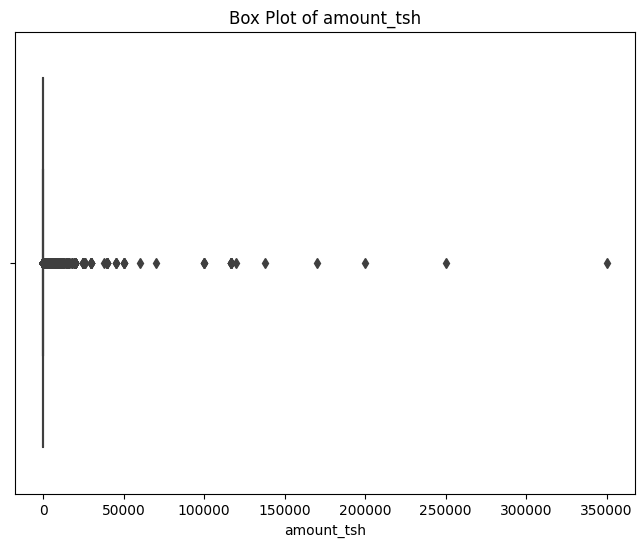

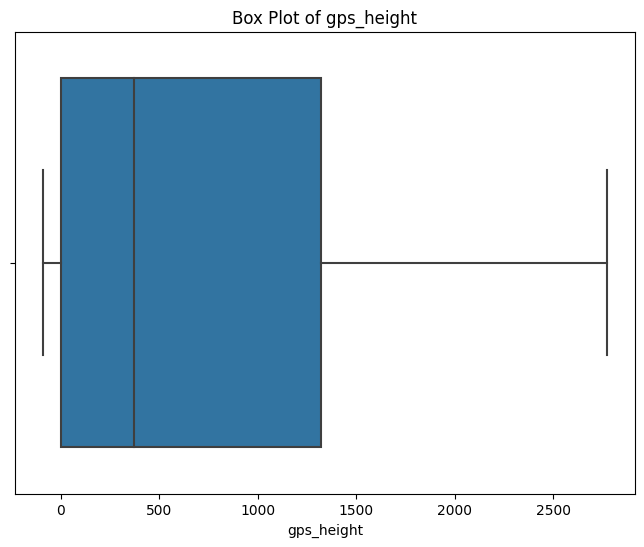

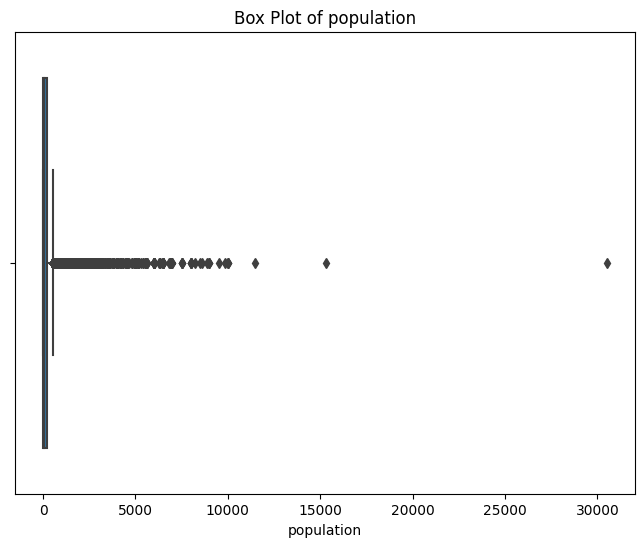

In [21]:
num_column = ["amount_tsh", "gps_height","population"]

for col in num_column:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=train, x=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

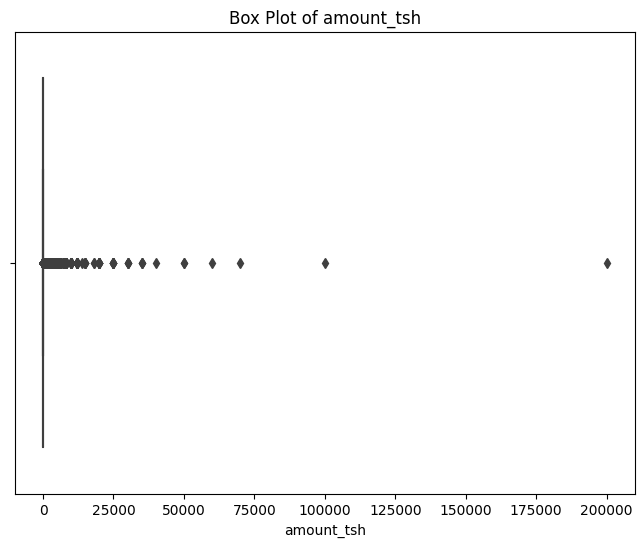

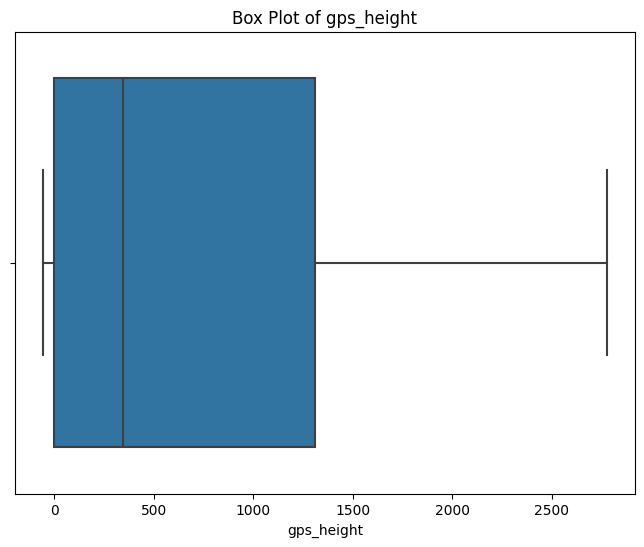

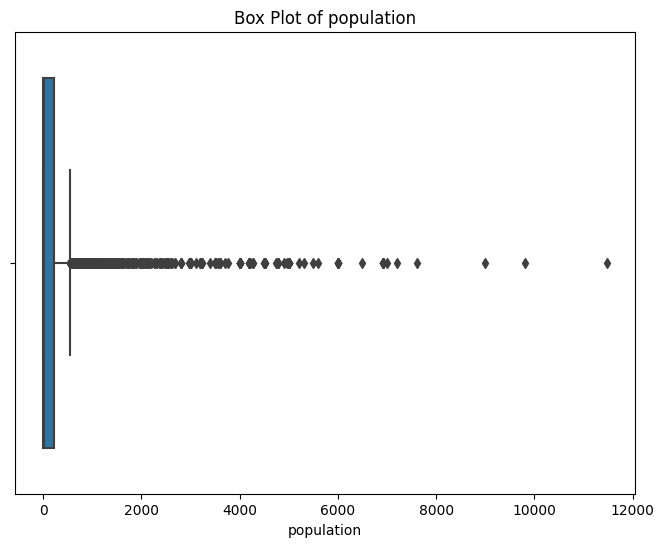

In [33]:
num_column = ["amount_tsh", "gps_height","population"]

for col in num_column:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=test, x=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

In [22]:
# removing the outliers in the train datasets
mean = train.mean()
std_dev = train.std()
threshold = 3
z_scores = (train - mean)/ std_dev.abs()
outliers = train[z_scores > threshold]

train_without_outliers = train[z_scores <= threshold]

In [24]:
# removing the outliers in the test datasets
mean = test.mean()
std_dev = test.std()
threshold = 3
z_scores = (test - mean)/ std_dev.abs()
outliers = test[z_scores > threshold]

test_without_outliers = test[z_scores <= threshold]

EDA

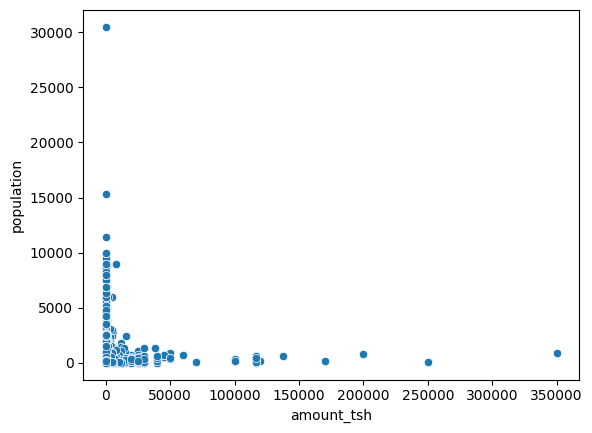

In [26]:
# a scatter plot of amount tsh and population
sns.scatterplot(data = train,x = "amount_tsh",y = "population")
plt.show()

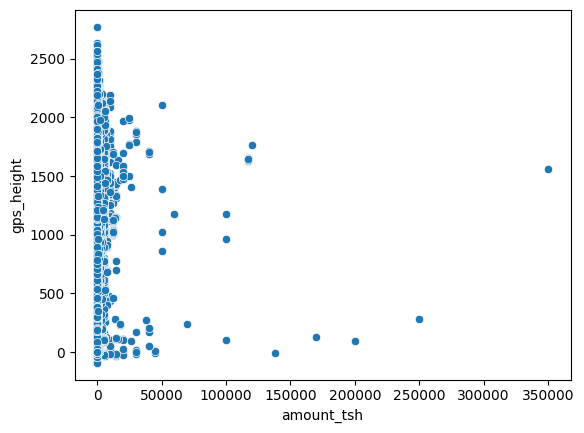

In [27]:
# scatterplot of amount tsh and gps height
sns.scatterplot(data = train,x = "amount_tsh",y = "gps_height")
plt.show()

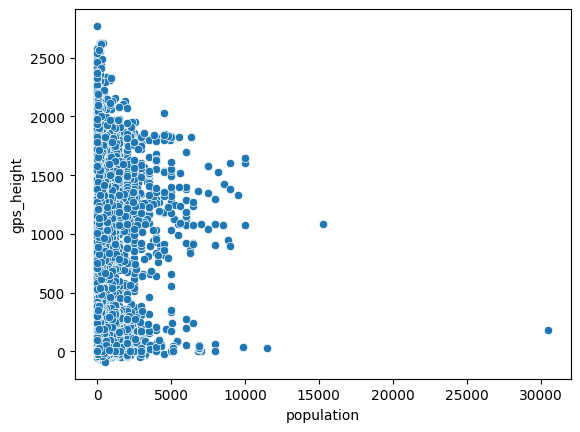

In [28]:
sns.scatterplot(data = train,x = "population",y = "gps_height")
plt.show()

<Axes: xlabel='status_group', ylabel='count'>

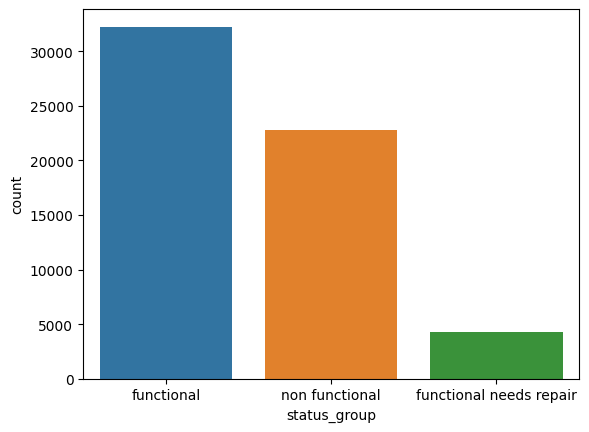

In [29]:
sns.countplot(data = train, x = "status_group")

most of the train data has most functional pumps and less functional needs repair pumps :  we can proceed to build our model but we will need to smaple based on the status group